In [1]:
import os
import librosa  # for audio processing
import numpy as np
from sklearn.model_selection import train_test_split

# directories for wav files
dirs = [
    "D:\\scriptie\\sensor_analysis\\CNN-training\\data\\fireworks5",
    "D:\\scriptie\\sensor_analysis\\CNN-training\\data\\rain5",
    "D:\\scriptie\\sensor_analysis\\CNN-training\\data\\wind5",
]




In [2]:
labels = []
data = []

# Loop over all files in all directories
for i, dir in enumerate(dirs):
    for filename in os.listdir(dir):
        if filename.endswith(".wav"):  # check if it's a .wav file
            # Load the audio file
            audio, sr = librosa.load(os.path.join(dir, filename), res_type='kaiser_fast')

            # Extract Mel-spectrogram from the audio
            mel_spect = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=1024)
            mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
            melspect_processed = np.mean(mel_spect.T,axis=0)

            # Add the Mel-spectrogram to the data list
            data.append(melspect_processed)

            # Add the label (i.e., the directory index) to the labels list
            labels.append(i)




In [3]:
# Convert data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [4]:
data.shape

(146, 128)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution1D, MaxPooling1D

# number of labels
num_labels = len(dirs)




In [6]:
# Build model
model = Sequential()

model.add(Convolution1D(128, 5, padding='same', input_shape=(128, 1)))  # Adjust input shape if necessary
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Convolution1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [7]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [8]:
history = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
11/11 [==============================] - 3s 50ms/step - loss: 6.5991 - accuracy: 0.3529 - val_loss: 1.9148 - val_accuracy: 0.4773
Epoch 2/100
11/11 [==============================] - 0s 12ms/step - loss: 3.5767 - accuracy: 0.3431 - val_loss: 0.7245 - val_accuracy: 0.6364
Epoch 3/100
11/11 [==============================] - 0s 12ms/step - loss: 1.5489 - accuracy: 0.5098 - val_loss: 0.6983 - val_accuracy: 0.8409
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 1.1863 - accuracy: 0.5490 - val_loss: 0.7948 - val_accuracy: 0.5455
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: 1.1307 - accuracy: 0.5294 - val_loss: 0.7672 - val_accuracy: 0.6364
Epoch 6/100
11/11 [==============================] - 0s 12ms/step - loss: 1.1069 - accuracy: 0.5392 - val_loss: 0.6988 - val_accuracy: 0.6818
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 0.8837 - accuracy: 0.6078 - val_loss: 0.7463 - val_accuracy: 0.7727
Epoch 

11/11 [==============================] - 0s 12ms/step - loss: 0.3858 - accuracy: 0.8529 - val_loss: 0.3374 - val_accuracy: 0.9091
Epoch 59/100
11/11 [==============================] - 0s 13ms/step - loss: 0.4876 - accuracy: 0.8039 - val_loss: 0.3220 - val_accuracy: 0.9318
Epoch 60/100
11/11 [==============================] - 0s 12ms/step - loss: 0.4454 - accuracy: 0.8137 - val_loss: 0.3076 - val_accuracy: 0.9318
Epoch 61/100
11/11 [==============================] - 0s 11ms/step - loss: 0.3706 - accuracy: 0.8431 - val_loss: 0.2605 - val_accuracy: 0.9318
Epoch 62/100
11/11 [==============================] - 0s 11ms/step - loss: 0.4401 - accuracy: 0.8431 - val_loss: 0.2811 - val_accuracy: 0.9318
Epoch 63/100
11/11 [==============================] - 0s 11ms/step - loss: 0.3645 - accuracy: 0.8627 - val_loss: 0.2415 - val_accuracy: 0.9318
Epoch 64/100
11/11 [==============================] - 0s 11ms/step - loss: 0.3641 - accuracy: 0.8627 - val_loss: 0.2631 - val_accuracy: 0.9318
Epoch 65/100

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test set accuracy: {accuracy * 100}%")


2/2 [==============================] - 0s 71ms/step - loss: 0.2561 - accuracy: 0.9318
Test set accuracy: 93.18181872367859%


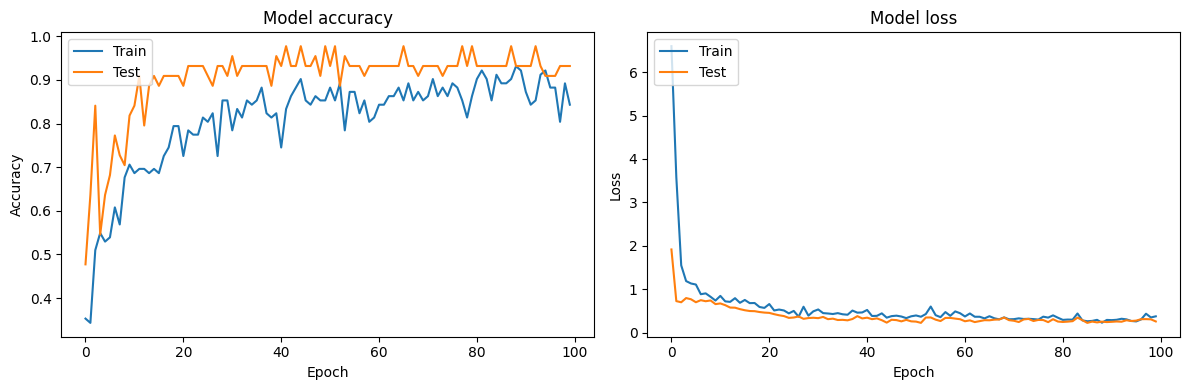

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


2/2 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.90      0.95        10
           2       1.00      0.85      0.92        13

    accuracy                           0.93        44
   macro avg       0.96      0.92      0.93        44
weighted avg       0.94      0.93      0.93        44



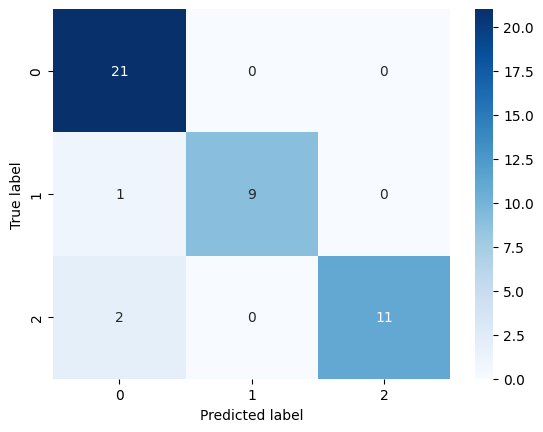

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict class probabilities
y_prob = model.predict(x_test)

# Convert probabilities into class predictions
y_pred = np.argmax(y_prob, axis=1)

# Print classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [12]:
# Save the entire model as a SavedModel.
# Save the entire model to a HDF5 file.
model.save('5-wav-mel.h5')
